# Question 4: Can a predictive model be built for future prediction of the possibility of complaints of the specific type that you identified in response to Question 1?

## Import datasets and basic libraries

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

binary_df = pd.read_csv("Merged Binary Complaint Approach.csv")
num_com_df = pd.read_csv("Num of Complaints Approach.csv")

/Users/zenoix/opt/anaconda3/envs/IBM-DS/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## This notebook will use two approaches to attempt to answer question 4
1. Use a binary approach where the features will either end in a complaint being made(represented by a 1) or not (represented by a 0)
2. Consider the total number of complaints for each street based on the building's features

In [2]:
binary_df.head()

,Incident Address,Complaint Made,Lot,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,NumBldgs,NumFloors,LotDepth,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR
0,2781 RESERVOIR AVENUE,1,56,21500,0,0,0,0,0,0.0,94.25,0.0,0,0,0.0,0.0,0.0,0.0
1,2691 RESERVOIR AVENUE,1,56,21500,0,0,0,0,0,0.0,94.25,0.0,0,0,0.0,0.0,0.0,0.0
2,2763 RESERVOIR AVENUE,1,56,21500,0,0,0,0,0,0.0,94.25,0.0,0,0,0.0,0.0,0.0,0.0
3,2763 RESERVOIR AVENUE,1,56,21500,0,0,0,0,0,0.0,94.25,0.0,0,0,0.0,0.0,0.0,0.0
4,2763 RESERVOIR AVENUE,1,56,21500,0,0,0,0,0,0.0,94.25,0.0,0,0,0.0,0.0,0.0,0.0


In [3]:
num_com_df.head()

,Number of Complaints,Lot,LotArea,BldgArea,ResArea,OfficeArea,RetailArea,NumBldgs,NumFloors,LotDepth,BldgDepth,YearBuilt,YearAlter1,BuiltFAR,ResidFAR,CommFAR,FacilFAR
0,975,9039,4905,0,0,0,0,0,0.0,93.55,0.0,0,0,0.0,6.02,0.0,6.5
1,4,112,11692,0,0,0,0,0,0.0,146.25,0.0,0,0,0.0,0.00,0.0,0.0
2,4,114,0,0,0,0,0,0,0.0,151.58,0.0,0,0,0.0,0.00,2.0,6.5
3,4,130,7200,0,0,0,0,0,0.0,118.00,0.0,1931,0,0.0,0.00,2.0,6.5
4,4,1,400,0,0,0,0,0,0.0,5.00,5.0,0,0,0.0,0.00,2.0,0.0


## Approach 1: Binary Approach
I am first going to be using a binary logistic regression to predict if a complaint will be made or not.

### Model building and training

In [4]:
# Create the features (X) and target (y)
X = binary_df[binary_df.columns[2:]]
y = binary_df["Complaint Made"]

In [5]:
# Scale the feature values
X = StandardScaler().fit(X).transform(X)

In [6]:
# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [7]:
# Build the model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.01, solver='liblinear')

# Train the model and create prediction of the testing data
logreg.fit(X_train, y_train)
yhat = logreg.predict(X_test)
yhat

array([0, 1, 1, ..., 1, 1, 1])

### Model evaluation
#### Jaccard index
Using Jaccard index evaluate the model

In [8]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.9899171594785319

We see that our model has a very good jaccard score of 0.989

#### Confusion matrix

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[329094   1095]
 [  2257  23975]]


Confusion matrix, without normalization
[[329094   1095]
 [  2257  23975]]


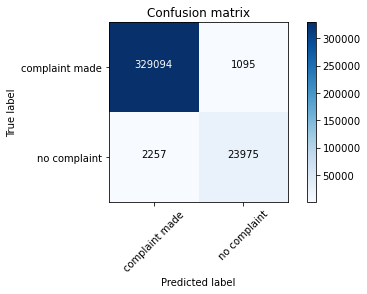

In [10]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['complaint made','no complaint'],normalize= False,  title='Confusion matrix')

#### F-1 score

In [11]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93     26232
           1       0.99      1.00      0.99    330189

    accuracy                           0.99    356421
   macro avg       0.97      0.96      0.96    356421
weighted avg       0.99      0.99      0.99    356421



The f-1 score of our logistic regression model is 0.99 which is very accurate.

### Approach 1 conclusion
Using a train test split of 70-30 and a logistic regression model on our data, we get a jaccard index of 0.989 and an f-1 score of 0.99. Overall the logistic regression model did very well at predicting whether a complaint is made based on the features ofa building.

## Approach 2: Using total number of complaints
For this approach, I will be trying two different models: a multiple linear regression model and a k-nearest neighbours (classification) model.

### Muliple linear regression
#### Model building and training

In [12]:
# Create the features (X) and target (y)
X = num_com_df[num_com_df.columns[1:]]
y = num_com_df["Number of Complaints"]

In [13]:
# Scale the feature values
X = StandardScaler().fit(X).transform(X)

In [14]:
# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [15]:
# train the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print ('Coefficients: ', lr.coef_)
print("Intercept:", lr.intercept_)

Coefficients:  [  0.14   0.36   1.81  -0.72   0.22   0.46  -0.34  -2.7   -1.22  -1.1
 -39.97  -0.23  -1.42   8.8   -1.18  -1.85]
Intercept: 11.721307551851885


#### Model Evaluation

In [16]:
# Use the model to create predictions
y_hat = lr.predict(X_test)

# Use ordinary least squares to evaluate the model
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lr.score(X_test, y_test))

Residual sum of squares: 26923.79
Variance score: 0.08


Looking at the high residual sum of squares in addition to the low variance score of 0.08, we can assume that using a multiple linear regression model may not be suitable for the approach

### K-Nearest Neighbours

#### Find the best K value to use

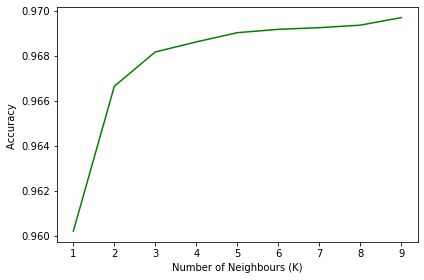

The K value with the highest accuracy is 9 with an accuracy of 0.9696913281453625


In [17]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# using K of 1 to 10, test the accuracy of the model based on the K value
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, yhat)

# plot the accuracy for the different values of K
plt.plot(range(1,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

print("The K value with the highest accuracy is", mean_acc.argmax()+1, "with an accuracy of", mean_acc.max())

#### Model building

In [18]:
# We can use the same train test split as before to train the KNN model
k=9
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=9)

#### Model evaluation

In [19]:
# make predictions
yhat = neigh.predict(X_test)
print("Train set Accuracy: ", accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Train set Accuracy:  0.9718981887816165
Test set Accuracy:  0.9696913281453625


We can see that the KNN model using a K value of 9 and a 70-30 split has a very high accuracy of roughly 0.97

### Approach 2 conclusion
Between using a multiple linear regression model and a K-nearest neighbours model on our heating complaint dataset, we see that the KNN model is a much better model to use.

## Final conclusion

Question 4: Can a predictive model be built for future prediction of the possibility of complaints of the specific type that you identified in response to Question 1? 

To answer the question, I used the two approaches discussed in the previous notebook to develop three machine learning models: a logistic regression, a multiple linear regression, and a k-nearest neighbour model. 

**Note: all the models were trained and tested using a 70-30 split to prevent underfitting and overfitting.**

For the first approach of a binary target (1 or 0), I only developed one model which was the logistic regression. This model had a **jaccard score of 0.989 and a f-1 score of 0.99**. These are both very high scores which indicates that the model may be useful as a predictive model to predict if a complaint will be made for any building.

For the second approach of considering the total number of complaints per building I developed two models: a multiple linear regression and a k-nearest neighbours model. For the multiple linear regression, the accuracy was very disappointing. It had a **residual sum of squares of 26923.79 (the lower the better) and a variance score of 0.08 (best score is 1).** This indicates that it wil most likely not be a good model to predict complaints. On the other hand, the KNN model did much better in its evaluation. Using a K value of 9, the **model had an accuracy score of roughly 0.97**. This means that the KNN model would probably be a better model to use to predict the number of complaints a building will make.